### K-means clustering

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

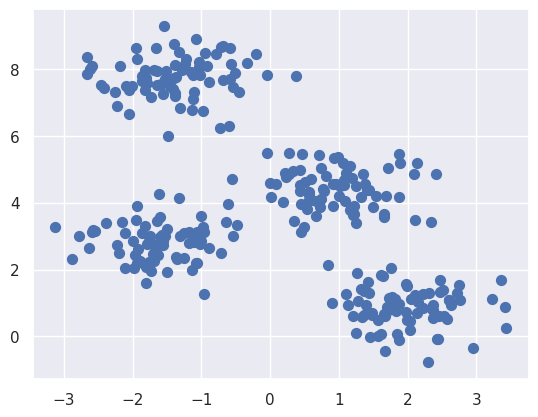

In [3]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


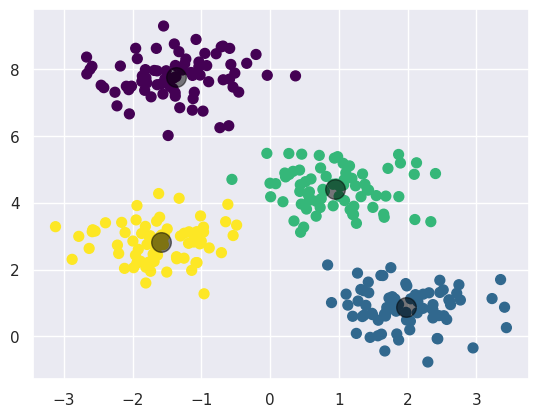

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

In [6]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters] # 隨機排序所有index -> 取前n_clusters數量的index當作center
    centers = X[i]

    while True:
        # Compute minimum distances between one point and a set of points
        labels = pairwise_distances_argmin(X, centers)
        # get the mean value of each cluster
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

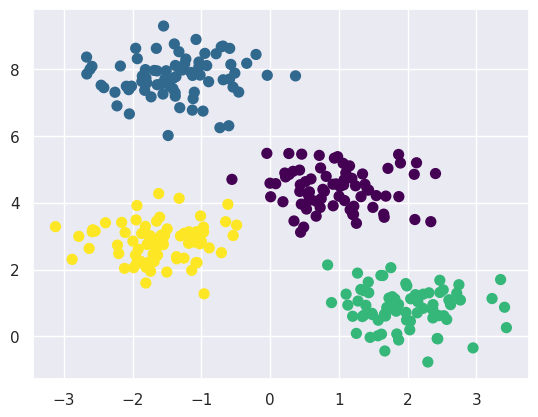

In [7]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")

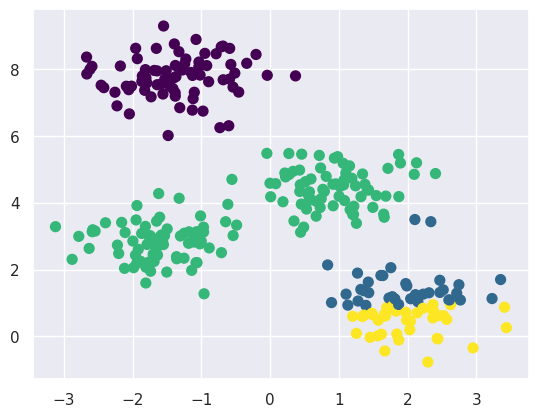

In [8]:
# 有時候可能無法達到全體最佳化
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


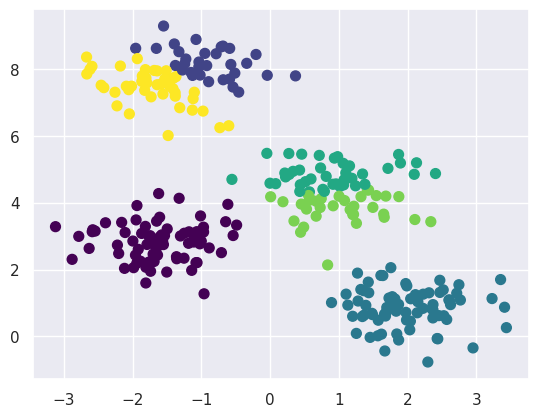

In [9]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")

#### Other model
- DBSCAN
- mean-shift
- affinity propagation
- Gaussian Mixture Models

##### Silhouette analysis(輪廓係數法)
- 用於決定最佳n_clusters數字

**Reference:** https://jimmy-huang.medium.com/kmeans%E5%88%86%E7%BE%A4%E6%BC%94%E7%AE%97%E6%B3%95-%E8%88%87-silhouette-%E8%BC%AA%E5%BB%93%E5%88%86%E6%9E%90-8be17e634589

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


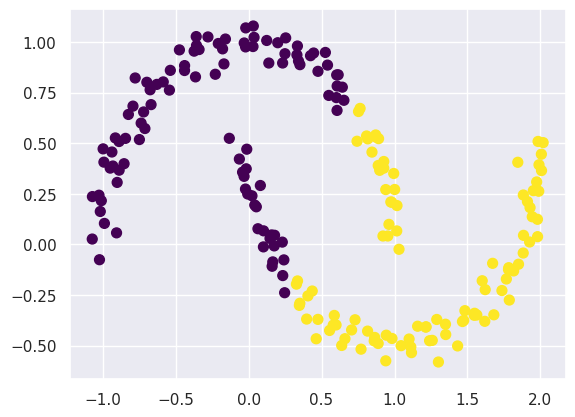

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


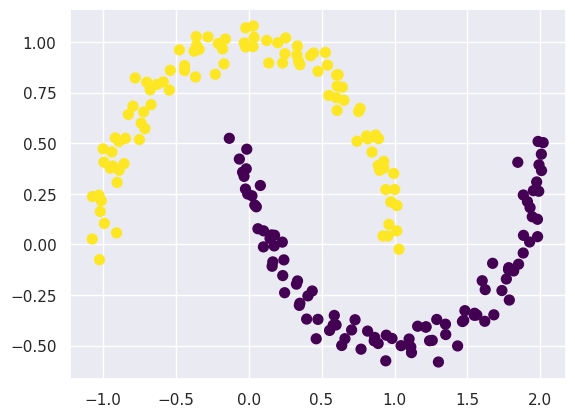

In [11]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,
                           affinity="nearest_neighbors",
                           assign_labels="kmeans")
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

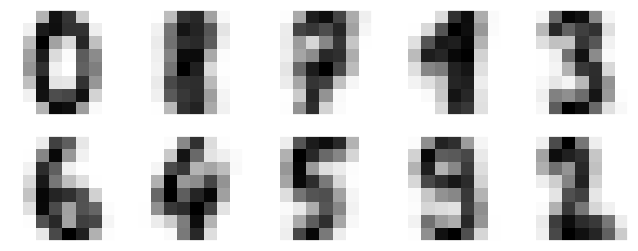

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation="nearest", cmap=plt.cm.binary)

In [15]:
from scipy.stats import mode

# Return an array of zeros with the same shape and type as a given array
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] # mode: 眾數

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

Text(109.44999999999997, 0.5, 'predicted label')

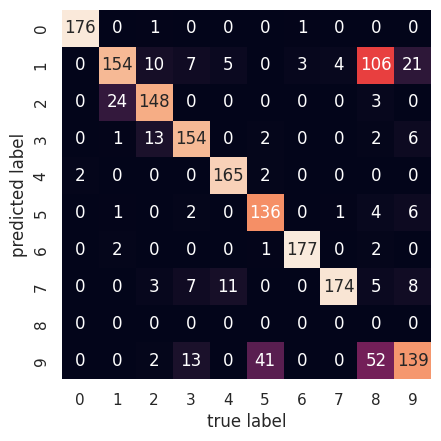

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel("true label")
plt.ylabel("predicted label")

#### t-distributed stochasitc neighbor embedding(t-SNE)
非線性的內嵌演算法，可以被用在保留群組中的資料點

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="pca", random_state=0)
digits_proj = tsne.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy_score(digits.target, labels)

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.9454646633277685

#### 使用k-means壓縮色彩

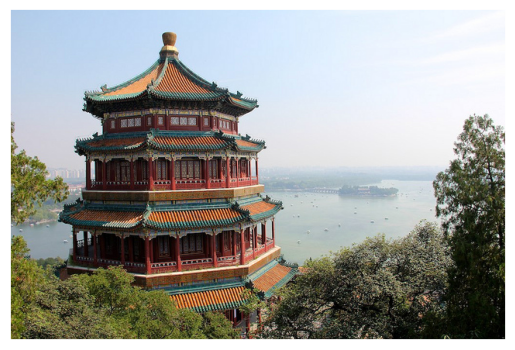

In [19]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [20]:
china.shape

(427, 640, 3)

In [21]:
data = china / 255.0 # use 0~1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [29]:
def plot_pixel(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker=".")
    ax[0].set(xlabel="Red", ylabel="Green", xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker=".")
    ax[1].set(xlabel="Red", ylabel="Blue", xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

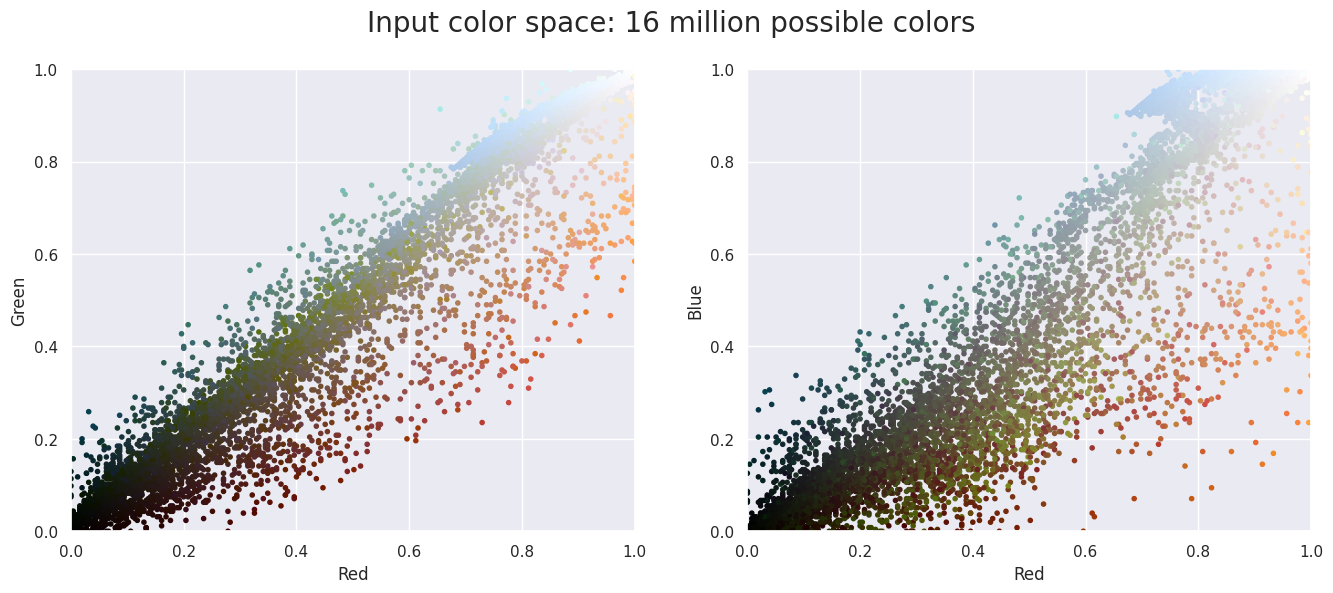

In [30]:
plot_pixel(data, title="Input color space: 16 million possible colors")

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


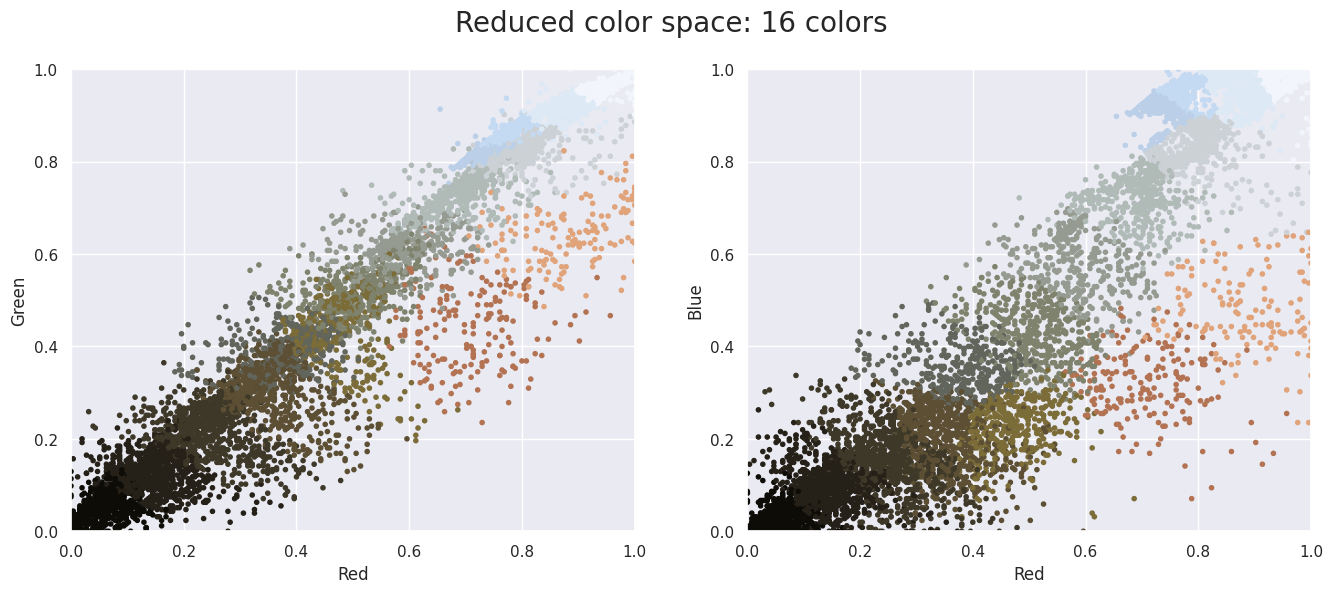

In [31]:
# 迷你批次k-means，會在資料的子集合中運作，結果會比標準的k-means快
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixel(data, colors=new_colors, title="Reduced color space: 16 colors")

In [32]:
kmeans.cluster_centers_

array([[0.73236606, 0.8172834 , 0.911566  ],
       [0.24133917, 0.21848069, 0.1594022 ],
       [0.68847331, 0.72783634, 0.71745438],
       [0.94798935, 0.96284895, 0.98724411],
       [0.35980808, 0.30795115, 0.20550847],
       [0.70047453, 0.45200107, 0.32590205],
       [0.05054383, 0.04833119, 0.0251861 ],
       [0.87751938, 0.639544  , 0.47779298],
       [0.48208825, 0.42317417, 0.22101487],
       [0.76714779, 0.85452977, 0.95296387],
       [0.871056  , 0.91502543, 0.96386011],
       [0.58936236, 0.60834491, 0.56705265],
       [0.14612869, 0.12494137, 0.09316677],
       [0.79913404, 0.81899755, 0.83402816],
       [0.38372549, 0.39616013, 0.35820261],
       [0.49910616, 0.51363363, 0.42897721]])

Text(0.5, 1.0, '16-color Image')

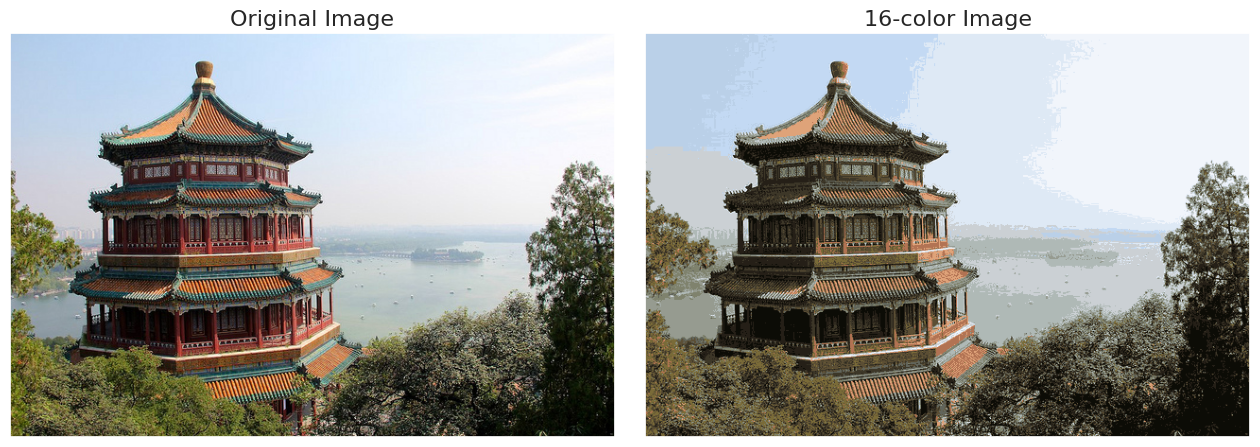

In [33]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw={"xticks": [], "yticks": []})
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16)